Working with pandas dataframes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
csvfile = 'Monitoring.csv'
df = pd.read_csv(csvfile, sep=';')
df.head()

,Record,Complete Date,Min Bat Voltage,Max Bat Voltage,Battery Current,3.3V IO,5V Analogic,3.3V Permanent,Board Temperature,Stack Temperature,Unnamed: 10
0,MONI,04/04/2017 16:32:52,13.98047,13.98828,0.011719,3.3125,4.90625,3.31250,23,255,NaN
1,MONI,04/04/2017 16:37:59,13.97656,13.98047,0.011719,3.3125,4.90625,3.28125,23,255,NaN
2,MONI,04/04/2017 16:43:08,13.97656,13.98047,0.011719,3.3125,4.90625,3.31250,23,255,NaN
3,MONI,04/04/2017 16:48:26,13.97266,13.97656,0.011719,3.3125,4.90625,3.31250,23,255,NaN
4,MONI,04/04/2017 16:53:46,13.96875,13.97266,0.011719,3.3125,4.90625,3.31250,22,255,NaN


In [4]:
df.describe()

,Min Bat Voltage,Max Bat Voltage,Battery Current,3.3V IO,5V Analogic,3.3V Permanent,Board Temperature,Stack Temperature,Unnamed: 10
count,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.0,0.0
mean,14.252525,14.402040,0.012299,3.284903,4.879926,3.283884,117.923848,255.0,NaN
std,1.023774,0.963119,0.002127,0.010042,0.011443,0.008684,31.523423,0.0,NaN
min,6.589844,6.609375,0.007812,3.281250,4.875000,3.281250,19.000000,255.0,NaN
25%,14.050780,14.535160,0.011719,3.281250,4.875000,3.281250,122.000000,255.0,NaN
50%,14.578130,14.640630,0.011719,3.281250,4.875000,3.281250,129.000000,255.0,NaN
75%,14.699220,14.714840,0.011719,3.281250,4.875000,3.281250,132.000000,255.0,NaN
max,14.917970,14.929690,0.027344,3.312500,4.937500,3.312500,135.000000,255.0,NaN


Since there are no values missing, we don't need to worry about the filling problem.

Also we see that some columns have insignificant standard deviation, so we can safely drop them as they probably do not correlate do any of the other columns.

In [5]:
df.drop(columns=['Unnamed: 10', 'Stack Temperature'], inplace=True)

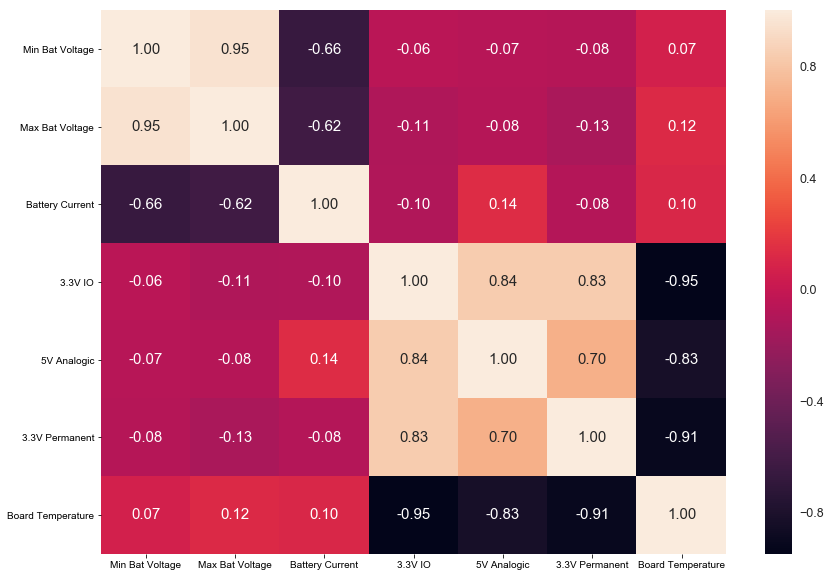

In [6]:
corrmat = df.corr()
fig, ax = plt.subplots(figsize=(14, 10))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, annot=True, cbar=True, fmt='.2f', ax=ax);

#fig = plt.figure()
#ax = fig.add_subplot(111)

In [7]:
df.drop(columns=['Record', '3.3V IO', '5V Analogic', '3.3V Permanent'], inplace=True)
df.head()

,Complete Date,Min Bat Voltage,Max Bat Voltage,Battery Current,Board Temperature
0,04/04/2017 16:32:52,13.98047,13.98828,0.011719,23
1,04/04/2017 16:37:59,13.97656,13.98047,0.011719,23
2,04/04/2017 16:43:08,13.97656,13.98047,0.011719,23
3,04/04/2017 16:48:26,13.97266,13.97656,0.011719,23
4,04/04/2017 16:53:46,13.96875,13.97266,0.011719,22


Text(0.5,0,'Date')

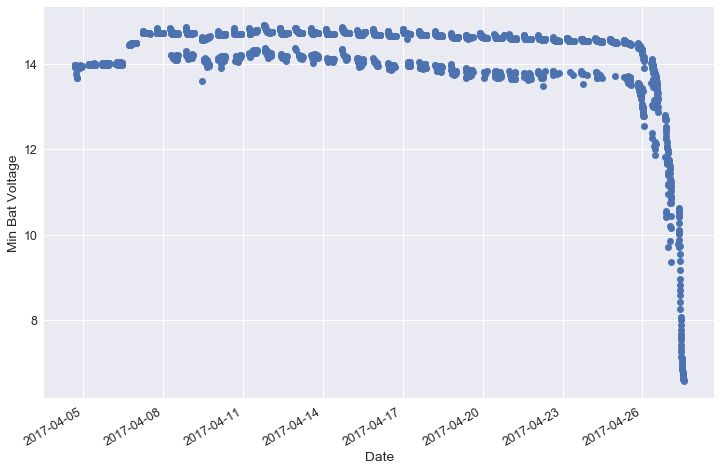

In [8]:
df['Complete Date'] = pd.to_datetime(df['Complete Date'])
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot_date(df['Complete Date'], df['Min Bat Voltage'])
fig.autofmt_xdate()
plt.ylabel('Min Bat Voltage')
plt.xlabel('Date')


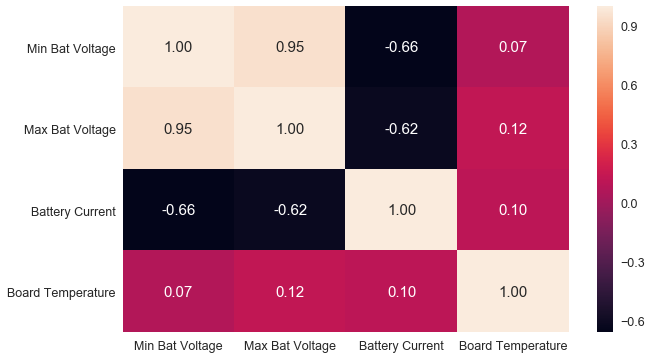

In [9]:
corrmat = df.corr()
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corrmat, annot=True, cbar=True, fmt='.2f', ax=ax)